<a href="https://colab.research.google.com/github/bambithenambi/MechOptimization/blob/main/ContourMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from timeit import default_timer as timer
from numba import jit, njit, vectorize
plt.style.use('seaborn-white')
array1=np.arange(1.0, 200.1, 0.1)
array2=np.arange(1.0, 200.1, 0.1)


In [73]:
@vectorize
def someFunc(a, b):
  return a+b

In [81]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

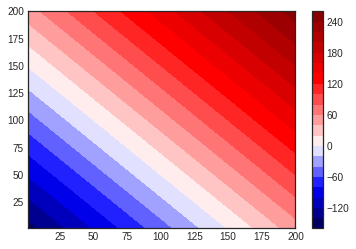

In [84]:
X, Y = np.meshgrid(array1, array2)
Z = someFunc(X, Y)
plt.contourf(X, Y, Z-150, 20, norm=MidpointNormalize(midpoint=0.), cmap='seismic')
plt.colorbar();

In [52]:
def std(aList, bList):
  result = np.zeros(shape=(len(aList),len(bList)))
  for a in range(len(aList)):
    for b in range(len(bList)):
      result[a][b]=someFunc(aList[a], bList[b])
  return result

In [74]:
%time std(array1, array2)

CPU times: user 9.47 s, sys: 26.1 ms, total: 9.49 s
Wall time: 9.49 s


array([[  2. ,   2.1,   2.2, ..., 200.8, 200.9, 201. ],
       [  2.1,   2.2,   2.3, ..., 200.9, 201. , 201.1],
       [  2.2,   2.3,   2.4, ..., 201. , 201.1, 201.2],
       ...,
       [200.8, 200.9, 201. , ..., 399.6, 399.7, 399.8],
       [200.9, 201. , 201.1, ..., 399.7, 399.8, 399.9],
       [201. , 201.1, 201.2, ..., 399.8, 399.9, 400. ]])

In [75]:
%time someFunc(X, Y)

CPU times: user 6.52 ms, sys: 10.2 ms, total: 16.7 ms
Wall time: 21.2 ms


array([[  2. ,   2.1,   2.2, ..., 200.8, 200.9, 201. ],
       [  2.1,   2.2,   2.3, ..., 200.9, 201. , 201.1],
       [  2.2,   2.3,   2.4, ..., 201. , 201.1, 201.2],
       ...,
       [200.8, 200.9, 201. , ..., 399.6, 399.7, 399.8],
       [200.9, 201. , 201.1, ..., 399.7, 399.8, 399.9],
       [201. , 201.1, 201.2, ..., 399.8, 399.9, 400. ]])